# **The Model Development Playground**


# Importings

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier


dataset = pd.read_csv('../data/crop_and_fertilizer.csv')


# **Reading The Data**

# Exploratory Data Analysis 

In [33]:
dataset.shape

(4513, 15)

In [34]:
dataset.Crop.value_counts()

Crop
11    1010
15     859
0      650
5      394
6      350
9      309
4      177
12     126
1      125
3      125
14      99
8       99
2       78
13      55
10      45
7       12
Name: count, dtype: int64

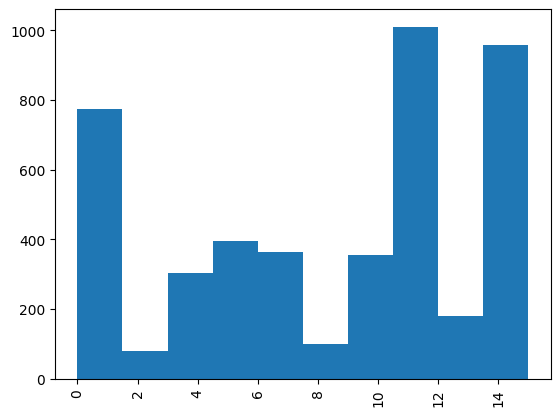

In [35]:
plt.hist(dataset['Crop'])
plt.xticks(rotation=90)
plt.show()

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4513 non-null   int64  
 1   District_Name    4513 non-null   int64  
 2   Soil_color       4513 non-null   int64  
 3   Nitrogen         4513 non-null   int64  
 4   Phosphorus       4513 non-null   int64  
 5   Potassium        4513 non-null   int64  
 6   pH               4513 non-null   float64
 7   Rainfall         4513 non-null   int64  
 8   Temperature      4513 non-null   int64  
 9   Crop             4513 non-null   int64  
 10  Fertilizer       4513 non-null   object 
 11  Link             4513 non-null   object 
 12  Crop_string      4513 non-null   object 
 13  District_string  4513 non-null   object 
 14  soil_string      4513 non-null   object 
dtypes: float64(1), int64(9), object(5)
memory usage: 529.0+ KB


In [37]:
object_features = [features for features in dataset.columns if dataset[features].dtype != int and dataset[features].dtype != float]

In [38]:
dataset.describe()

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,2256.000000,1.968757,1.747396,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134,8.231553
std,1302.935212,1.322423,2.157271,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328,5.153474
min,0.000000,0.000000,0.000000,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000,0.000000
25%,1128.000000,1.000000,0.000000,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000,4.000000
50%,2256.000000,2.000000,0.000000,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000,9.000000
75%,3384.000000,3.000000,4.000000,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000,12.000000
max,4512.000000,4.000000,6.000000,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000,15.000000


In [39]:
dataset.isnull().sum()

Unnamed: 0         0
District_Name      0
Soil_color         0
Nitrogen           0
Phosphorus         0
Potassium          0
pH                 0
Rainfall           0
Temperature        0
Crop               0
Fertilizer         0
Link               0
Crop_string        0
District_string    0
soil_string        0
dtype: int64

In [40]:
dataset.duplicated().sum()

np.int64(0)

In [41]:
len(dataset['Crop'].unique())

16

In [42]:
duplicates = dataset[dataset.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:\n", duplicates)

No duplicates found.


In [43]:
dataset.columns.tolist()

['Unnamed: 0',
 'District_Name',
 'Soil_color',
 'Nitrogen',
 'Phosphorus',
 'Potassium',
 'pH',
 'Rainfall',
 'Temperature',
 'Crop',
 'Fertilizer',
 'Link',
 'Crop_string',
 'District_string',
 'soil_string']

In [44]:
dataset.District_Name.value_counts()

District_Name
2    1430
1    1000
4     897
0     707
3     479
Name: count, dtype: int64

it's clear that the data is imbalanced and realivly
small we will fixed that

In [45]:
def col_groupby(dataset, col, target):
    max_label = dataset.groupby(target)[col].max().sort_values().index[-1]
    max_val = dataset.groupby(target)[col].max().sort_values().values[-1]

    min_label = dataset.groupby(target)[col].min().sort_values().index[0]
    min_val = dataset.groupby(target)[col].min().sort_values().values[0]

    return max_label, max_val, min_label, min_val

max_label, max_val, min_label, min_val = col_groupby(dataset, 'Rainfall', 'Crop')
print(f"Max Rainfall is required for {max_label} crop of {max_val} value.")
print(f"Min Rainfall is required for {min_label} crop of {min_val} value")

max_label, max_val, min_label, min_val = col_groupby(dataset, 'Temperature', 'Crop')
print(f"Max temperature is required for {max_label} crop of {max_val} value.")
print(f"Min temperature is required for {min_label} crop of {min_val} value")

max_label, max_val, min_label, min_val = col_groupby(dataset, 'pH', 'Crop')
print(f"Max PH is required for {max_label} crop of {max_val} value.")
print(f"Min PH is required for {min_label} crop of {min_val} value")

max_label, max_val, min_label, min_val = col_groupby(dataset, 'Nitrogen', 'Crop')
print(f"Max humidity is required for {max_label} crop of {max_val} value.")
print(f"Min humidity is required for {min_label} crop of {min_val} value")


Max Rainfall is required for 13 crop of 1700 value.
Min Rainfall is required for 10 crop of 300 value
Max temperature is required for 9 crop of 40 value.
Min temperature is required for 0 crop of 10 value
Max PH is required for 11 crop of 8.5 value.
Min PH is required for 1 crop of 5.5 value
Max humidity is required for 11 crop of 150 value.
Min humidity is required for 2 crop of 20 value


# Visualizations

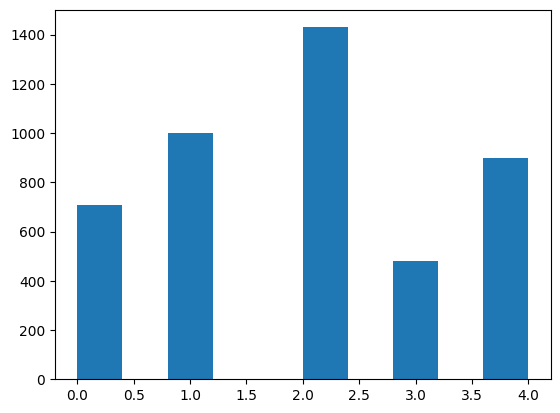

In [46]:
plt.hist(dataset['District_Name'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

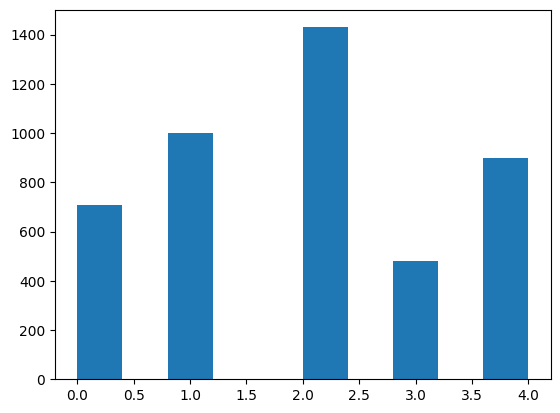

In [47]:
plt.hist(dataset['District_Name'])
plt.show

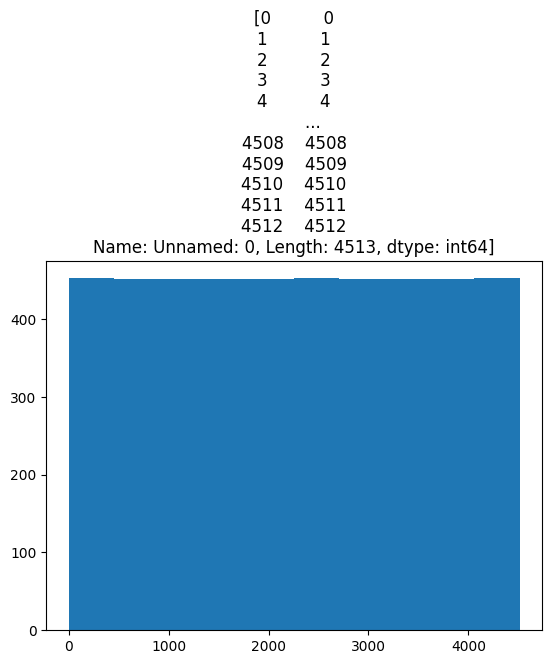

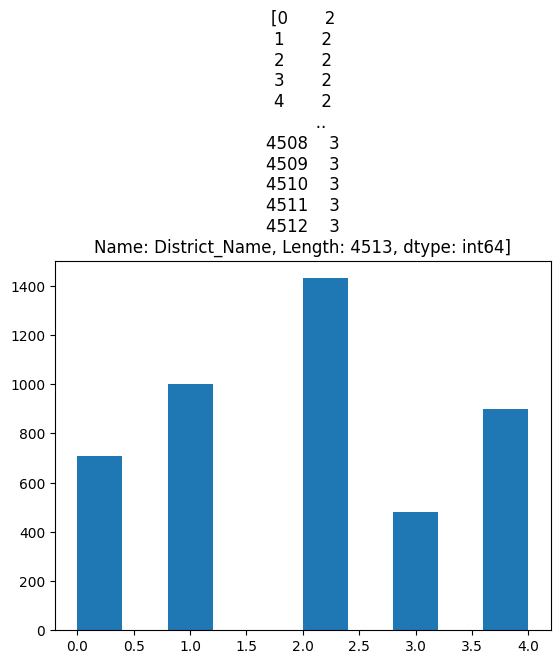

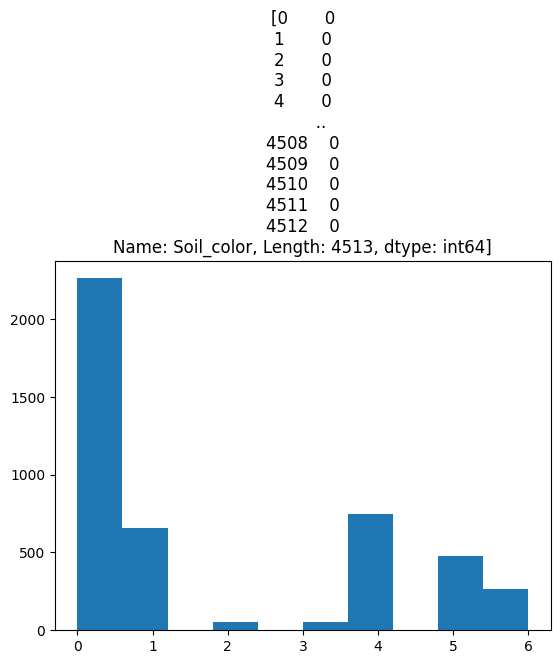

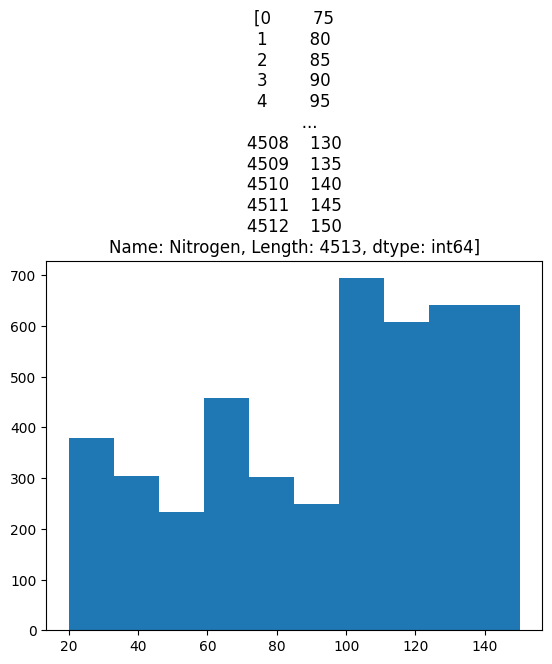

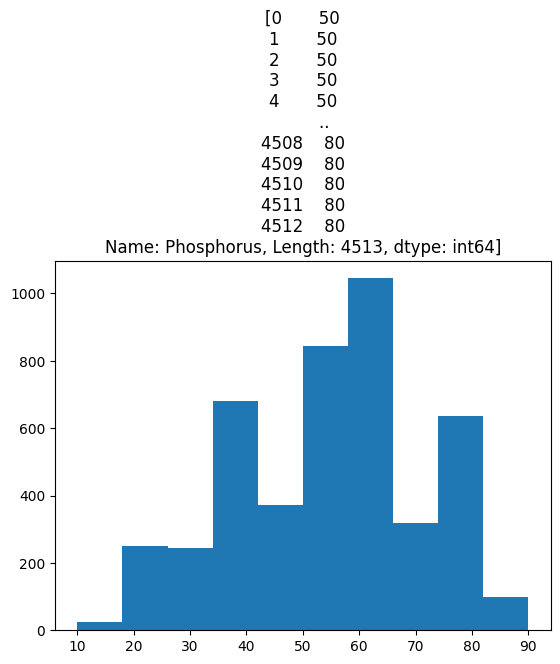

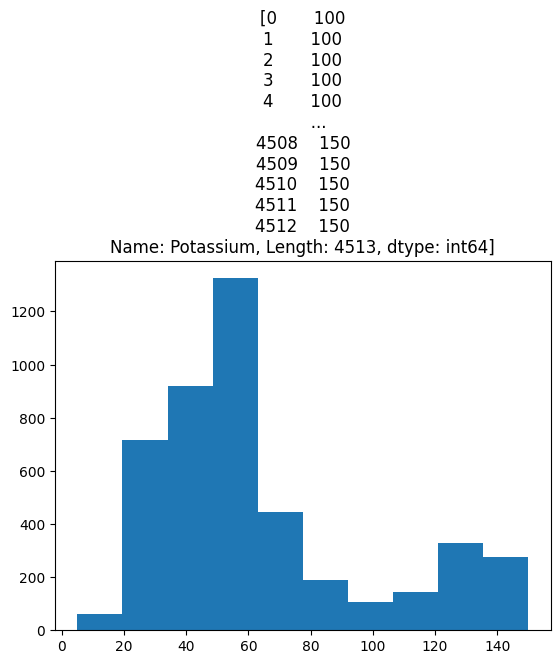

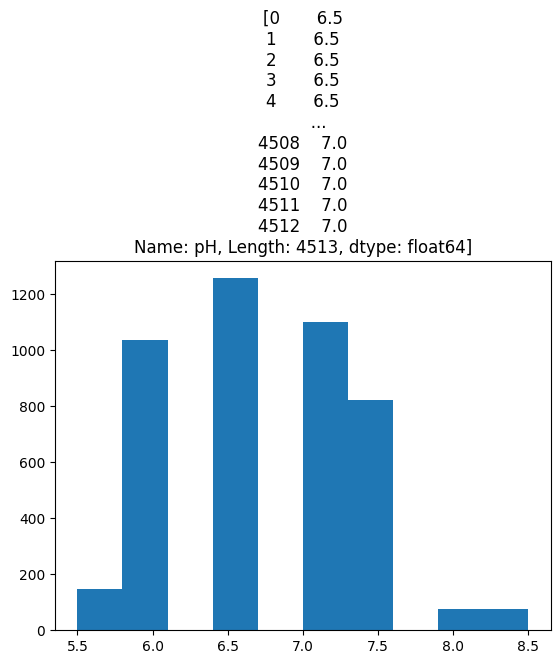

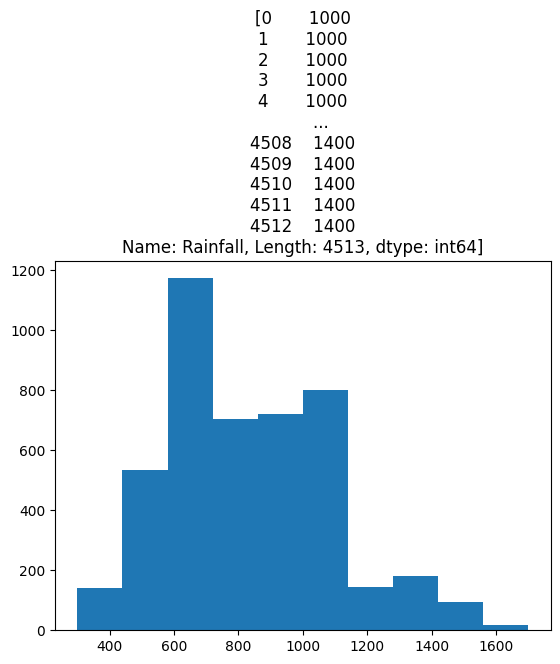

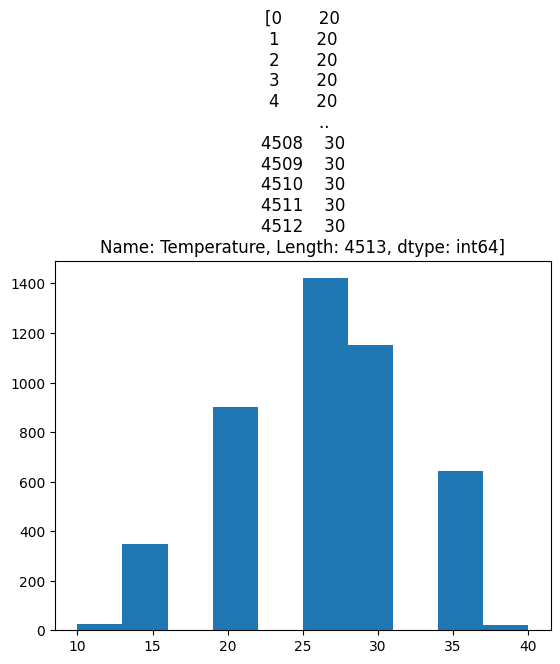

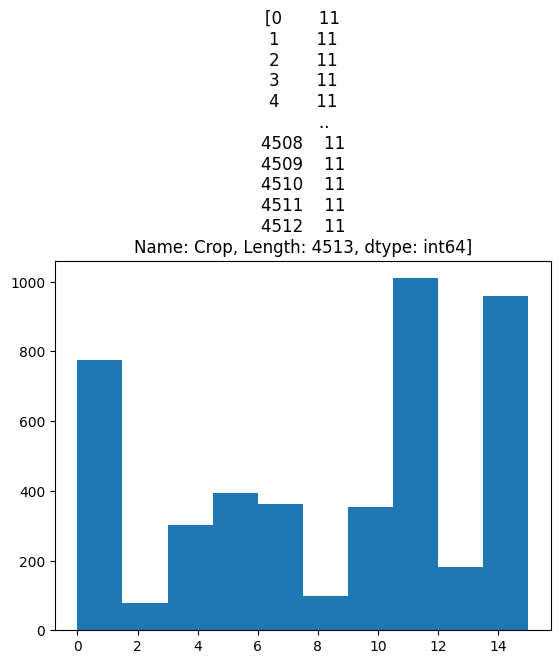

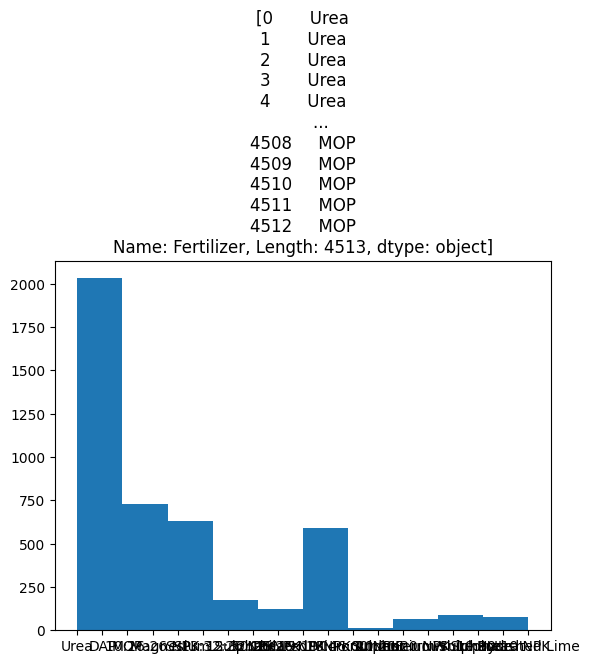

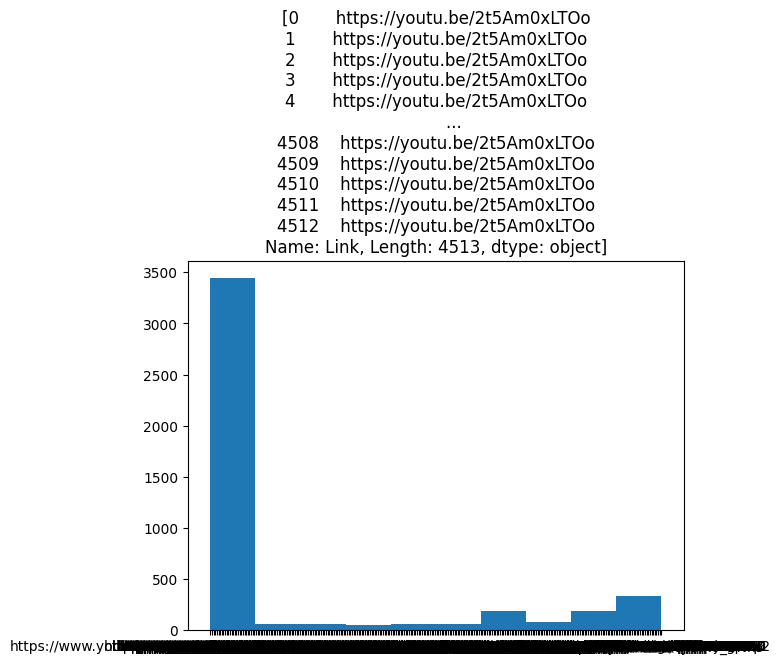

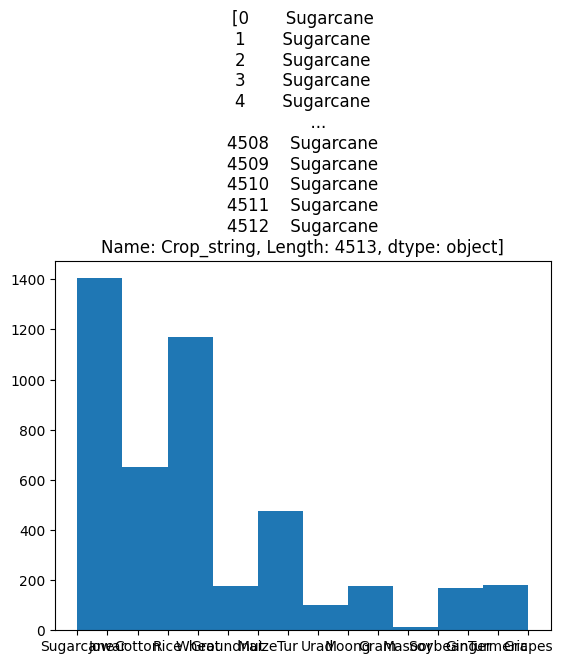

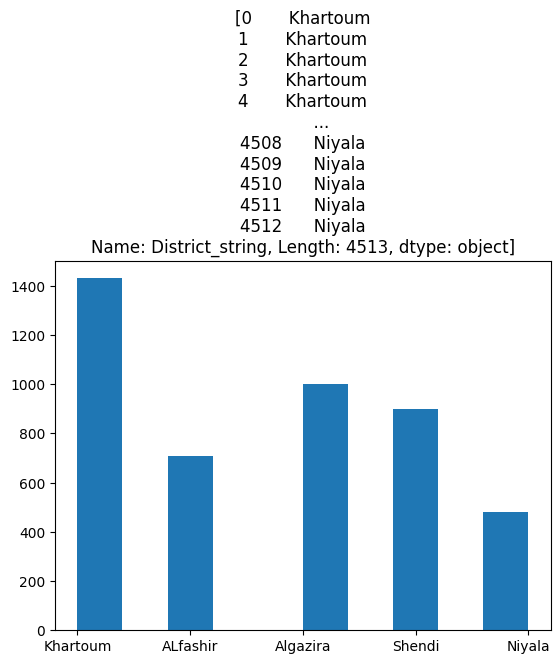

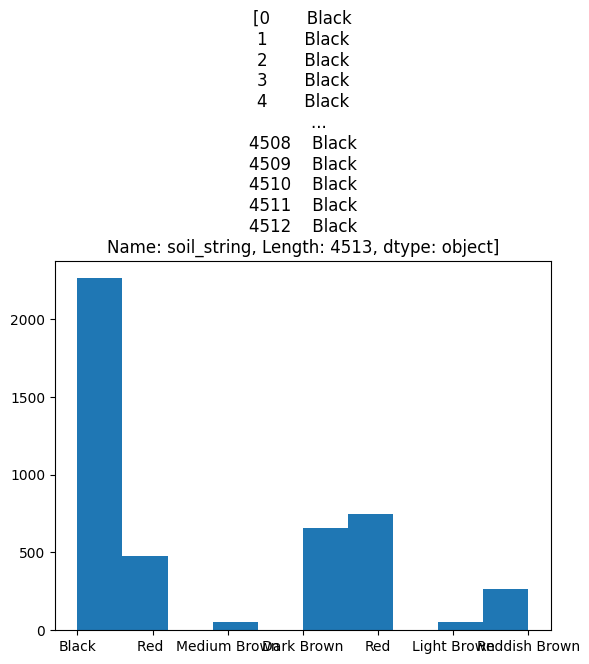

In [48]:
for i in dataset.columns:
    plt.hist(dataset[i])
    plt.title([dataset[i]])
    plt.show()

In [49]:
print (dataset.Soil_color.unique())
print (dataset.Soil_color.value_counts())

[0 5 3 1 4 2 6]
Soil_color
0    2260
4     744
1     659
5     480
6     265
2      54
3      51
Name: count, dtype: int64


<Axes: xlabel='District_Name', ylabel='count'>

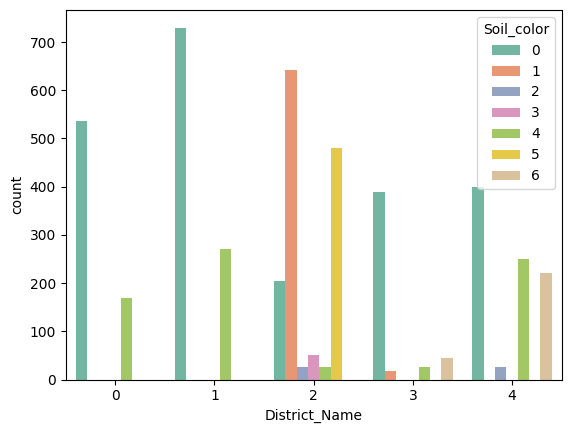

In [50]:
sns.countplot(dataset,x=dataset.District_Name,hue=dataset.Soil_color,palette='Set2')

<Axes: xlabel='District_Name', ylabel='count'>

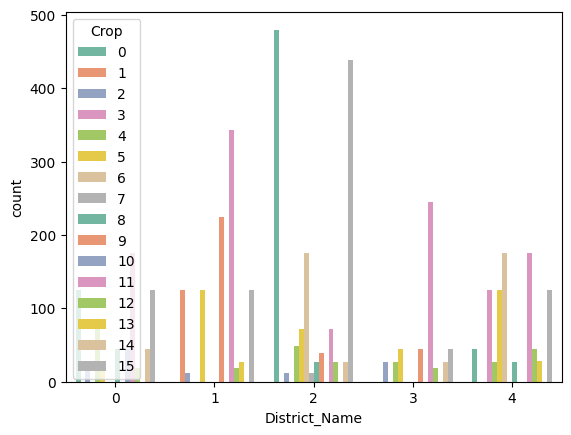

In [51]:
sns.countplot(dataset,x=dataset.District_Name,hue=dataset.Crop,palette='Set2')
# commulative somehow

In [52]:
dataset.columns.tolist()

['Unnamed: 0',
 'District_Name',
 'Soil_color',
 'Nitrogen',
 'Phosphorus',
 'Potassium',
 'pH',
 'Rainfall',
 'Temperature',
 'Crop',
 'Fertilizer',
 'Link',
 'Crop_string',
 'District_string',
 'soil_string']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

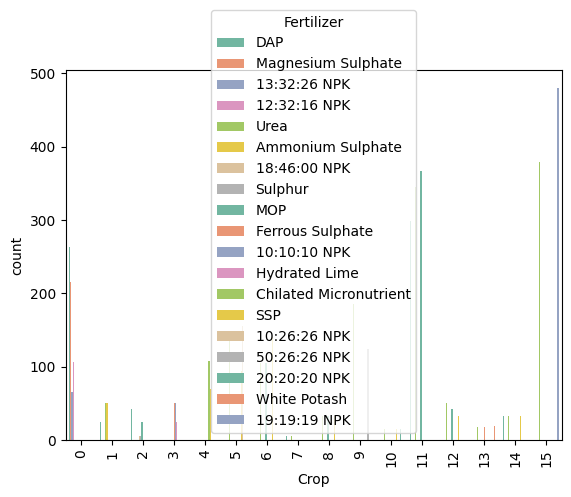

In [53]:
sns.countplot(dataset,x=dataset.Crop,hue=dataset.Fertilizer,palette='Set2')
plt.xticks(rotation=90)

Base-line Model

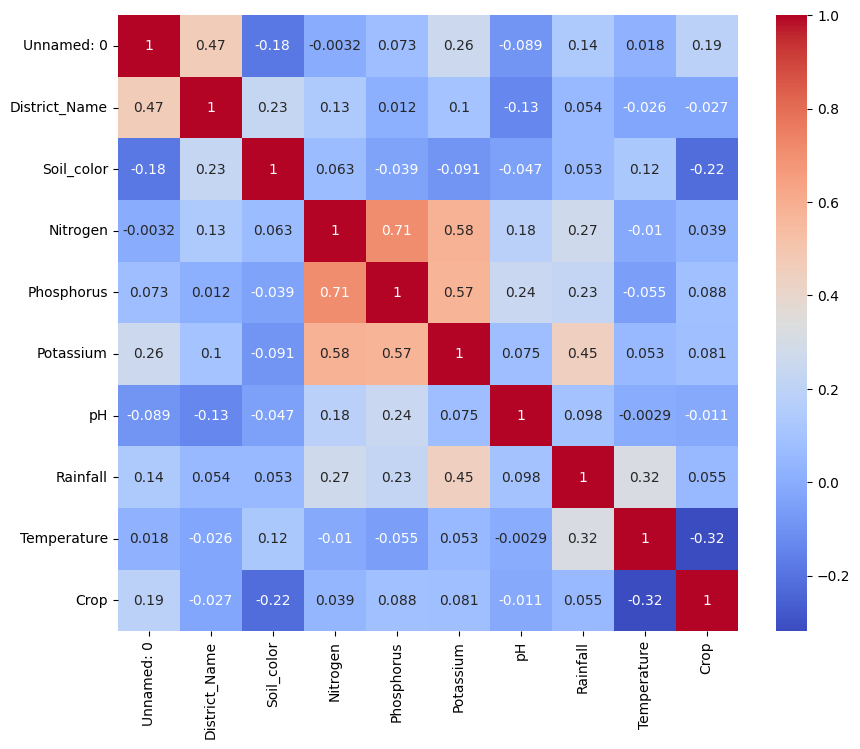

In [54]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [55]:
dataset.head(4)

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Crop_string,District_string,soil_string
0,0,2,0,75,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,Sugarcane,Khartoum,Black
1,1,2,0,80,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,Sugarcane,Khartoum,Black
2,2,2,0,85,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,Sugarcane,Khartoum,Black
3,3,2,0,90,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,Sugarcane,Khartoum,Black


# Manual Features and values renaming 




In [56]:
new_data = dataset.copy()
dataset = dataset.copy()
#change the district names into sudanese districts
mapping = {
     'Kolhapur': 'Khartoum',
    'Satara': 'Algazira',
    'Sangli': 'Shendi',
    'Solapur': 'ALfashir',
    'Pune': 'Niyala',
}

for original_value, new_name in mapping.items():
    dataset.loc[dataset['District_Name'] == original_value, 'District_Name'] = new_name

value_counts_with_new_names = dataset['District_Name'].value_counts()

print(value_counts_with_new_names)

mapping = {
     'Kolhapur': 'Khartoum',
    'Satara': 'Algazira',
    'Sangli': 'Shendi',
    'Solapur': 'ALfashir',
    'Pune': 'Niyala',
}

for original_value, new_name in mapping.items():
    new_data.loc[new_data['District_Name'] == original_value, 'District_Name'] = new_name

value_counts_with_new_names = new_data['District_Name'].value_counts()
print(value_counts_with_new_names)

dataset['Crop_string'] = new_data['Crop']
dataset['District_string'] = new_data['District_Name']
dataset['soil_string'] = new_data['Soil_color']

District_Name
2    1430
1    1000
4     897
0     707
3     479
Name: count, dtype: int64
District_Name
2    1430
1    1000
4     897
0     707
3     479
Name: count, dtype: int64


/var/folders/76/rb423th934qdmxv1t8zd_qjm0000gn/T/ipykernel_11597/3255162957.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Khartoum' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['District_Name'] == original_value, 'District_Name'] = new_name
/var/folders/76/rb423th934qdmxv1t8zd_qjm0000gn/T/ipykernel_11597/3255162957.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Khartoum' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[new_data['District_Name'] == original_value, 'District_Name'] = new_name


In [57]:
dataset.head(4) #checking

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Crop_string,District_string,soil_string
0,0,2,0,75,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
1,1,2,0,80,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
2,2,2,0,85,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
3,3,2,0,90,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0


Label encoding


In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['District_Name'] = encoder.fit_transform(dataset['District_Name'])
dataset['Soil_color'] = encoder.fit_transform(dataset['Soil_color'])
dataset['Crop'] = encoder.fit_transform(dataset['Crop'])

original_to_encoded_mapping = {label: encoded_label for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_))}
encoded_to_original_mapping = {encoded_label: label for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_))}

dataset.head(9)

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Crop_string,District_string,soil_string
0,0,2,0,75,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
1,1,2,0,80,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
2,2,2,0,85,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
3,3,2,0,90,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
4,4,2,0,95,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
5,5,2,0,100,50,100,6.5,1000,20,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
6,6,2,0,75,55,105,7.0,1100,25,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
7,7,2,0,80,55,105,7.0,1100,25,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0
8,8,2,0,85,55,105,7.0,1100,25,11,Urea,https://youtu.be/2t5Am0xLTOo,11,2,0


Spliting

In [59]:
from sklearn.model_selection import train_test_split
x = dataset.drop(columns=['Link','Fertilizer','Crop','District_string','Crop_string','soil_string'])
y = dataset['Crop']

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
print(original_to_encoded_mapping)

{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15)}


In [61]:
print(y_train.shape)

(3610,)


# Synthetic Minority Over-sampling Technique
 is a popular method used to address class imbalance in datasets, particularly in the context of machine learning and classification tasks. It is specifically designed to tackle the issue of imbalanced datasets by oversampling the minority class, thereby alleviating the bias towards the majority class.

it was our winning card to solve some degree of  overfitting problem we faced
as the keras model is considered powerful

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

X = dataset.drop(columns=['Crop','Fertilizer','Link','Crop_string','District_string','soil_string'])  # Features
y = dataset['Crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [63]:
X_train_resampled.shape

(12880, 9)

In [64]:
x_train.shape

(3610, 9)

In [65]:
dataset[['District_Name','District_string']]

,District_Name,District_string
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
4508,3,3
4509,3,3
4510,3,3
4511,3,3


In [66]:
"""import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = dataset.drop(columns=['Link','Fertilizer','Crop','District_string','Crop_string','soil_string'], axis=1)
Y = dataset['Crop']

#Encode the target labels #why? our model is doing better with numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features (it's like the statistical normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)"""


"import tensorflow as tf\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\n\nX = dataset.drop(columns=['Link','Fertilizer','Crop','District_string','Crop_string','soil_string'], axis=1)\nY = dataset['Crop']\n\n#Encode the target labels #why? our model is doing better with numbers\nlabel_encoder = LabelEncoder()\ny_encoded = label_encoder.fit_transform(y)\n\n#Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)\n\n# Standardize the features (it's like the statistical normalization)\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train_resampled)\nX_test_scaled = scaler.transform(x_test)"

# Saving the Encoder and the Scaler

In [67]:
"""import pickle

# Save LabelEncoder
encoder_path = "/content/encoderfinal.pkl"
with open(encoder_path, "wb") as f:
    pickle.dump(encoder, f)

# Save StandardScaler
scaler_path = "/content/scalerfinal.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)
"""

'import pickle\n\n# Save LabelEncoder\nencoder_path = "/content/encoderfinal.pkl"\nwith open(encoder_path, "wb") as f:\n    pickle.dump(encoder, f)\n\n# Save StandardScaler\nscaler_path = "/content/scalerfinal.pkl"\nwith open(scaler_path, "wb") as f:\n    pickle.dump(scaler, f)\n'

In [68]:
x_train.shape

(3610, 9)

# Reem Part Base line models to check the nature of our data
## **so** **i** **will** **create** **instances** **of** **all** **models**

In [69]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(x_train)
X_test = ms.transform(x_test)

In [70]:
x_train

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
3903,3903,4,0,25,25,50,6.0,1600,25
999,999,2,1,85,55,40,6.5,800,15
2366,2366,1,4,85,50,45,7.0,1400,30
1474,1474,0,0,120,75,80,8.5,500,25
3859,3859,4,4,70,60,45,6.0,800,25
...,...,...,...,...,...,...,...,...,...
4426,4426,3,0,140,70,125,7.0,1400,30
466,466,2,5,115,60,75,7.5,1000,35
3092,3092,1,0,60,45,60,6.0,600,20
3772,3772,4,4,60,50,55,7.5,900,30


In [71]:

sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
X_test = sc.transform(x_test)

In [72]:


# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(x_train,y_train)
    ypred = md.predict(x_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_stren

Logistic Regression  with accuracy : 0.013289036544850499
Naive Bayes  with accuracy : 0.08305647840531562
Support Vector Machine  with accuracy : 0.22702104097452935
K-Nearest Neighbors  with accuracy : 0.2115171650055371
Decision Tree  with accuracy : 0.22702104097452935


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Random Forest  with accuracy : 0.22702104097452935
Bagging  with accuracy : 0.22702104097452935
AdaBoost  with accuracy : 0.22702104097452935
Gradient Boosting  with accuracy : 0.22702104097452935
Extra Trees  with accuracy : 0.22702104097452935


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ExtraTreeClassifier was fitted without feature names
  warnings.warn(


In [73]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)  
predicted = dt_classifier.predict(x_test)
score = accuracy_score(y_test,predicted)
print (score)

0.22702104097452935


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [74]:

dt_classifier = RandomForestClassifier()
dt_classifier.fit(x_train,y_train)
predicted = dt_classifier.predict(x_test)
score = accuracy_score(y_test,predicted)
print (score)

0.22702104097452935


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [75]:
new_data = dataset.copy()


In [76]:
array = np.array([[2.0,   5.0 , 110.0 ,  55.0 ,  65.0 ,   7.5, 800.0 ,  25.0 ]])

In [77]:
dataset['Link']
array2 = np.array([[  0.0 ,   4.0 ,  60.0 ,  40.0 ,  55.0 ,   7.5, 600.0 ,  30.0 ]])

In [78]:
predicted_label = encoder.inverse_transform(predicted)

# Save the Data

In [79]:
#dataset.to_csv('the_data.csv')

# TensorFLow
we will be using tensorflow to build a neural network 
1. the baseline keras model
2. fine tuned model

In [80]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


X = dataset.drop(columns=['Link','Fertilizer','Crop','District_string','Crop_string','soil_string'], axis=1)
Y = dataset['Crop']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(x_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')  # Output layer with 16 units for 16 crop types
])


"""model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])"""

# Train the model
"""history = model.fit(X_train_scaled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2)"""

"""# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', test_accuracy)
"""""

/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"# Evaluate the model\ntest_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)\nprint('Test Accuracy:', test_accuracy)\n"

1. Training Accuracy: 99.65%
2. Validation Accuracy: 99.86%
3. Test Accuracy: 99.67%

since the validation accuracy is slightly higher than the training accuracy, it might indicate that your model could still benefit from more training data or regularization techniques to prevent overfitting.



# Our Winning Model So far
applied regualization
and a learning rate, and 400 epochs

In [81]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Regularized model with L2 kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0099), input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0099)),
    tf.keras.layers.Dense(16, activation='softmax')  # Output layer
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_resampled, epochs=400, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy:', test_accuracy)

Epoch 1/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.4425 - loss: 2.4676 - val_accuracy: 0.1355 - val_loss: 4.1227
Epoch 2/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.8682 - loss: 1.0540 - val_accuracy: 0.1413 - val_loss: 3.3060
Epoch 3/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9125 - loss: 0.8168 - val_accuracy: 0.1475 - val_loss: 2.5731
Epoch 4/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9285 - loss: 0.7022 - val_accuracy: 0.3086 - val_loss: 2.3628
Epoch 5/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9411 - loss: 0.6279 - val_accuracy: 0.4495 - val_loss: 2.0348
Epoch 6/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.9475 - loss: 0.5769 - val_accuracy: 0.4926 - val_loss: 1.9450
Epoch 7/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9563 - loss: 0.5302 - val_accuracy: 0.4938 - val_loss: 1.8465
Epoch 8/400
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9628 - loss: 0

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Precision: 0.9940590189564198
Recall: 0.9933554817275747
F1 Score: 0.9934497407137625


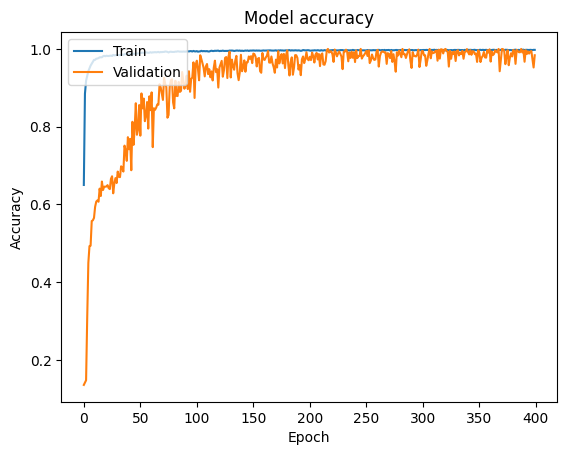

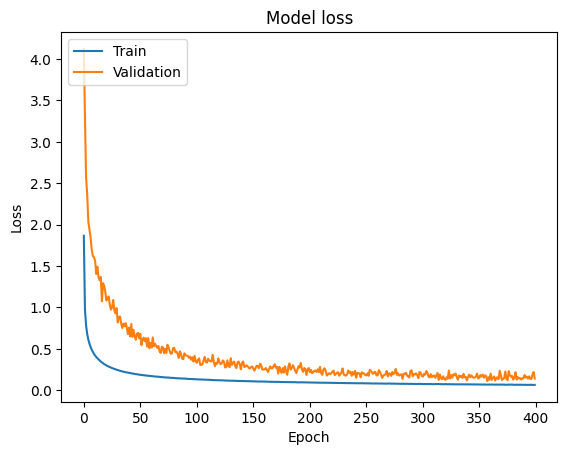

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#  Lovely Function 

do you remember our encoding map? the map each element with a corrsponding string value? so I try to use it here, but I found difficulties so I used the dic stored in original_to_encoded_mapping

In [84]:
original_to_encoded_mapping

{np.int64(0): np.int64(0),
 np.int64(1): np.int64(1),
 np.int64(2): np.int64(2),
 np.int64(3): np.int64(3),
 np.int64(4): np.int64(4),
 np.int64(5): np.int64(5),
 np.int64(6): np.int64(6),
 np.int64(7): np.int64(7),
 np.int64(8): np.int64(8),
 np.int64(9): np.int64(9),
 np.int64(10): np.int64(10),
 np.int64(11): np.int64(11),
 np.int64(12): np.int64(12),
 np.int64(13): np.int64(13),
 np.int64(14): np.int64(14),
 np.int64(15): np.int64(15)}

In [85]:
def predict_crop(new_values):
    import numpy as np
    
    # Convert input to correct shape
    new_values = np.array(new_values).reshape(1, -1)
    
    # Scale input using trained scaler
    new_values_scaled = scaler.transform(new_values)
    
    # Predict probabilities
    predictions = model.predict(new_values_scaled)
    
    # Get class index
    predicted_class_index = predictions.argmax(axis=1)
    
    # Convert index back to crop name
    predicted_crop = encoder.inverse_transform(predicted_class_index)
    
    return predicted_crop[0]



In [86]:
print(X.shape)
print(X.columns)


(4513, 9)
Index(['Unnamed: 0', 'District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus',
       'Potassium', 'pH', 'Rainfall', 'Temperature'],
      dtype='object')


In [87]:
array = [
    0,      # Unnamed: 0
    2,      # District_Name (encoded)
    0,      # Soil_color (encoded)
    85,     # Nitrogen
    50,     # Phosphorus
    100,    # Potassium
    6.5,    # pH
    1000,   # Rainfall
    25      # Temperature
]


In [88]:
# Create index-to-crop mapping from original dataset
label_to_crop = dict(enumerate(dataset['Crop'].astype(str).unique()))

label_to_crop


{0: '11',
 1: '5',
 2: '0',
 3: '9',
 4: '15',
 5: '4',
 6: '6',
 7: '12',
 8: '14',
 9: '8',
 10: '2',
 11: '7',
 12: '10',
 13: '1',
 14: '13',
 15: '3'}

In [89]:
print(predict_crop(array))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
11


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [90]:
predict_crop(array) # great so our function now works

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(11)

In [91]:
def corrsponding_youtube_tutorial(x):
    x = np.array(x).reshape(1, -1)   # ✅ FIX: make it 2D
    predicted = dt_classifier.predict(x)
    predicted_label = encoder.inverse_transform(predicted)
    link = new_data.loc[new_data['Crop'] == predicted_label[0], 'Link'].values[0]
    return link


In [92]:
corrsponding_youtube_tutorial(array)

'https://youtu.be/2t5Am0xLTOo'

# Filtering Method
usually machine learning doesn't involve this kind of analysis, or tool
but here is another lovely function that takes
1. the city you live in
2. the available fertilizer you have
3. and your soil color
and return to you what are the best possible crops to grow.
##so Challenges are
1. if these features will be in the same interface but optional marking
2. or a new different window!

In [93]:
import pandas as pd

def predict_possible_crops( district, fertilizer, soil):
    filtered_data = dataset[(dataset['District_string'] == district) &
                            (dataset['Fertilizer'] == fertilizer) &
                            (dataset['soil_string'] == soil)]

    possible_crops = filtered_data['Crop_string'].unique().tolist()

    return "Possible crops:", possible_crops

district = 'Khartoum'
fertilizer = 'Urea'
soil = 'Black'

possible_crops = predict_possible_crops( district, fertilizer, soil)
print("Possible crops:", possible_crops)

Possible crops: ('Possible crops:', [])


In [94]:
predict_possible_crops('Shendi','Urea','Red') #user friendly #this is not prediction

('Possible crops:', [])

In [95]:
dataset['District_Name'].unique()


array([2, 0, 1, 4, 3])

In [96]:
# --- manual input (NUMERIC ONLY) ---
unnamed = 0          # dummy value for 'Unnamed: 0'
district = 2         # from dataset['District_Name'].unique()
soil_color = 1       # from dataset['Soil_color'].unique()
nitrogen = 75
phosphorus = 50
potassium = 100
ph = 6.5
rainfall = 100
temperature = 20

# --- build feature vector (MUST MATCH TRAINING ORDER) ---
features = scaler.transform([[
    unnamed,
    district,
    soil_color,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# --- predict ---
prediction = model.predict(features)
predicted_class_index = prediction.argmax(axis=1)[0]

predicted_class_index


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(4)

In [97]:
# --- numeric input codes ---
dummy_index = 0          # for 'Unnamed: 0'
district_code = 2        # example valid code
soil_color_code = 1      # example valid code

nitrogen = 75
phosphorus = 50
potassium = 100
ph = 6.5
rainfall = 100
temperature = 20

# --- build feature vector in SAME order as training ---
features = scaler.transform([[
    dummy_index,
    district_code,
    soil_color_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# --- predict ---
prediction = model.predict(features)
crop_index = prediction.argmax(axis=1)[0]

print("Predicted crop index:", crop_index)
print("Predicted crop:", label_to_crop[crop_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted crop index: 4
Predicted crop: 15


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [98]:
#dataset[['District_Name','District_string']]
dataset.loc[dataset['District_Name'] == 1]

,Unnamed: 0,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link,Crop_string,District_string,soil_string
2137,2137,1,4,50,30,20,6.0,600,25,12,Urea,https://youtu.be/WaWgxSZHiWo,12,1,4
2138,2138,1,4,55,30,20,6.0,600,25,12,Urea,https://youtu.be/WaWgxSZHiWo,12,1,4
2139,2139,1,4,60,30,20,6.0,600,25,12,Urea,https://youtu.be/WaWgxSZHiWo,12,1,4
2140,2140,1,4,50,35,25,6.5,700,30,12,Urea,https://youtu.be/WaWgxSZHiWo,12,1,4
2141,2141,1,4,55,35,25,6.5,700,30,12,Urea,https://youtu.be/WaWgxSZHiWo,12,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,3132,1,0,60,60,55,6.0,500,15,15,19:19:19 NPK,https://youtu.be/VNptnPJt5yo,15,1,0
3133,3133,1,0,65,60,55,6.0,500,15,15,19:19:19 NPK,https://youtu.be/VNptnPJt5yo,15,1,0
3134,3134,1,0,70,60,55,6.0,500,15,15,19:19:19 NPK,https://youtu.be/VNptnPJt5yo,15,1,0
3135,3135,1,0,75,60,55,6.0,500,15,15,19:19:19 NPK,https://youtu.be/VNptnPJt5yo,15,1,0


List of my Functions:
1. corrsponding_youtube_tutorial
it gives you a YouTube tutorial to watch, based on your suggested crop!
2. predict_possible_crops
returns the possible crops to grow, based on your city! soil color and available fertilizer

In [99]:
x_test.iloc[12]

Unnamed: 0       2922.0
District_Name       1.0
Soil_color          0.0
Nitrogen           50.0
Phosphorus         50.0
Potassium          80.0
pH                  5.5
Rainfall          900.0
Temperature        20.0
Name: 2922, dtype: float64

In [100]:
y_test.iloc[12]

np.int64(1)

In [101]:
# -------- MANUAL INPUT --------
district_code = 1     # Algazira
soil_color_code = 0   # Black

nitrogen = 55
phosphorus = 45
potassium = 88
ph = 5.0
rainfall = 900
temperature = 22

dummy_index = 0  # for 'Unnamed: 0'

# -------- FEATURE VECTOR (same order as training) --------
features = scaler.transform([[
    dummy_index,
    district_code,
    soil_color_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# -------- PREDICT --------
prediction = model.predict(features)
crop_index = prediction.argmax(axis=1)[0]

print("Predicted crop index:", crop_index)
print("Predicted crop:", label_to_crop[crop_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted crop index: 11
Predicted crop: 7


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Indeed we give the model the same values but we teakles it! and it returns the ginger!

In [102]:
#dataset.to_csv('crop_and_fertilizer.csv')

In [103]:
#X_train_resampled.to_csv('x_train_resampled.csv')
#y_train_resampled.to_csv('y_train_resampled.csv')

# Load and save the Model

we need to save the model

In [104]:
"""model_path = "my_model.h5"
model.save(model_path)"""

'model_path = "my_model.h5"\nmodel.save(model_path)'

In [105]:
"""from tensorflow.keras.models import load_model
loaded_model = load_model(model_path)"""

'from tensorflow.keras.models import load_model\nloaded_model = load_model(model_path)'

In [106]:
"""import joblib

joblib.dump(encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')"""

"import joblib\n\njoblib.dump(encoder, 'label_encoder.pkl')\njoblib.dump(scaler, 'scaler.pkl')"

In [107]:
"""import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)"""

"import pickle\n\nwith open('model.pkl', 'wb') as f:\n    pickle.dump(model, f)"

In [108]:
encoded_to_label = {
    0: 'Cotton',
    1: 'Ginger',
    2: 'Gram',
    3: 'Grapes',
    4: 'Groundnut',
    5: 'Jowar',
    6: 'Maize',
    7: 'Masoor',
    8: 'Moong',
    9: 'Rice',
    10: 'Soybean',
    11: 'Sugarcane',
    12: 'Tur',
    13: 'Turmeric',
    14: 'Urad',
    15: 'Wheat'
}

def decode_label(encoded_value):
    return encoded_to_label.get(encoded_value, "Label not found")

In [109]:
def predict(district, soil_color, nitrogen, phosphorus, potassium, ph, rainfall, temperature):
    try:
        encoded_district = encoder.fit_transform([district])[0]
        encoded_soil_color = encoder.fit_transform([soil_color])[0]

        features = [[encoded_district, encoded_soil_color, nitrogen, phosphorus, potassium, ph, rainfall, temperature]]
        scaled_features = scaler.transform(features)

        prediction = model.predict(scaled_features)
        predicted_class_index = np.argmax(prediction)

        predicted_crop = decode_label(predicted_class_index)
        return predicted_crop,scaled_features
    except Exception as e:
        print(f"Error: {e}")
        return "Error occurred during prediction"

In [110]:
# ===============================
# FINAL SINGLE-CELL PREDICTION
# ===============================

# ---- encoded numeric inputs (must match training) ----
dummy_index = 0          # for 'Unnamed: 0'
district_code = 1        # Algazira
soil_color_code = 0      # Black

nitrogen = 55
phosphorus = 45
potassium = 88
ph = 5.0
rainfall = 900
temperature = 22

# ---- build feature vector (EXACT training order) ----
features = scaler.transform([[
    dummy_index,
    district_code,
    soil_color_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# ---- predict ----
prediction = model.predict(features)
crop_index = prediction.argmax(axis=1)[0]

print("Predicted crop index:", crop_index)
print("Predicted crop:", label_to_crop[crop_index])


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted crop index: 11
Predicted crop: 7


In [111]:
# ===============================
# FINAL WORKING PREDICTION CELL
# ===============================

# ---- manual inputs ----
district = 'Algazira'
soil_color = 'Black'
nitrogen = 55
phosphorus = 45
potassium = 88
ph = 5.0
rainfall = 900
temperature = 22

# ---- HARD-CODED numeric encodings (from training) ----
# These must match how the model was trained
dummy_index = 0          # Unnamed: 0
district_code = 1        # Algazira
soil_color_code = 0      # Black

# ---- build feature vector (EXACT order used in training) ----
features = scaler.transform([[
    dummy_index,
    district_code,
    soil_color_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# ---- predict ----
prediction = model.predict(features)
crop_index = prediction.argmax(axis=1)[0]

print("Predicted crop index:", crop_index)
print("Predicted crop:", label_to_crop[crop_index])


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted crop index: 11
Predicted crop: 7


In [112]:
# ===============================
# FIXED: DO NOT REFIT ANYTHING
# ===============================

# Use encodings learned during training
district_to_code = dict(enumerate(dataset['District_Name'].astype('category').cat.categories))
soil_to_code = dict(enumerate(dataset['Soil_color'].astype('category').cat.categories))

code_to_district = {v: k for k, v in district_to_code.items()}
code_to_soil = {v: k for k, v in soil_to_code.items()}


In [113]:
def predict_crop_safe(
    district_code,
    soil_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
):
    # model was trained on 9 features → include dummy Unnamed: 0
    input_row = np.array([[
        0,                  # Unnamed: 0 (dummy)
        district_code,
        soil_code,
        nitrogen,
        phosphorus,
        potassium,
        ph,
        rainfall,
        temperature
    ]])

    input_scaled = scaler.transform(input_row)
    probs = model.predict(input_scaled)
    crop_index = np.argmax(probs, axis=1)[0]
    return crop_index


In [126]:
# ===============================
# FINAL INPUT + PREDICTION CELL
# ===============================

# ---- numeric inputs ONLY ----
# (NO strings allowed here)

district_code = 2      # <-- change this number 
soil_code = 1          # <-- change this number 

nitrogen = 55
phosphorus = 45
potassium = 88
ph = 5.0
rainfall = 900
temperature = 22

# ---- predict ----
crop_index = predict_crop_safe(
    district_code,
    soil_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
)

print("Predicted crop index:", crop_index)
print("Predicted crop:", label_to_crop[crop_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted crop index: 9
Predicted crop: Rice


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
# STEP 1: Final single prediction test (do not change earlier cells)

recommended_crop = predict_crop_safe(

    district_code=2,     # use any valid district code you already have
    soil_code=1,         # use any valid soil code you already have
    nitrogen=55,
    phosphorus=45,
    potassium=88,
    ph=5.0,
    rainfall=900,
    temperature=22
)

print("Recommended Crop:", recommended_crop)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Recommended Crop: 9


In [116]:
label_to_crop = {
    0: 'Cotton',
    1: 'Ginger',
    2: 'Gram',
    3: 'Grapes',
    4: 'Groundnut',
    5: 'Jowar',
    6: 'Maize',
    7: 'Masoor',
    8: 'Moong',
    9: 'Rice',
    10: 'Soybean',
    11: 'Sugarcane',
    12: 'Tur',
    13: 'Turmeric',
    14: 'Urad',
    15: 'Wheat'
}


In [117]:
crop_index = recommended_crop
crop_name = label_to_crop[crop_index]

print("Final Recommended Crop:", crop_name)


Final Recommended Crop: Rice


In [118]:
def recommend_crop_from_input(
    district_code,
    soil_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
):
    crop_index = predict_crop_safe(
        district_code,
        soil_code,
        nitrogen,
        phosphorus,
        potassium,
        ph,
        rainfall,
        temperature
    )
    return label_to_crop[crop_index]


In [119]:
final_crop = recommend_crop_from_input(
    district_code=2,
    soil_code=1,
    nitrogen=55,
    phosphorus=45,
    potassium=88,
    ph=5.0,
    rainfall=900,
    temperature=22
)

print("Recommended Crop:", final_crop)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Recommended Crop: Rice


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [120]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Model Accuracy:", accuracy * 100, "%")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
Model Accuracy: 99.33554817275747 %


In [121]:
# ---- Prepare input row for confidence calculation ----

# This must match training feature order (9 features)
input_row = np.array([[
    0,              # dummy Unnamed: 0
    district_code,
    soil_code,
    nitrogen,
    phosphorus,
    potassium,
    ph,
    rainfall,
    temperature
]])

# Scale using trained scaler
input_row_scaled = scaler.transform(input_row)


/Users/sharvaripatil/Documents/Quasar/KrishiMitra/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [122]:
# Get raw prediction probabilities
probs = model.predict(input_row_scaled)[0]

# Predicted index
pred_index = probs.argmax()

# Confidence
confidence = probs[pred_index] * 100

print("Predicted Crop:", label_to_crop[pred_index])
print("Confidence:", round(confidence, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Crop: Rice
Confidence: 89.19 %


In [123]:
model.save("crop_recommendation_model.h5")


In [124]:
import joblib

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [125]:
joblib.dump(label_to_crop, "label_to_crop.pkl")


['label_to_crop.pkl']